In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [9]:
df = pd.read_pickle("./results_2024/runtimes1000-4000_1.pkl") 

In [10]:
df

,Our Time,ETE Time,CTI,OTUs
0,0.006043,0.272059,0.014680,1000
1,0.005468,0.203946,0.011872,1000
2,0.005583,0.175152,0.013846,1000
3,0.005417,0.153278,0.012748,1000
4,0.005473,0.049042,0.013715,1000
...,...,...,...,...
3995,0.023704,1.614559,0.003653,4000
3996,0.025817,4.120800,0.003551,4000
3997,0.023487,1.161827,0.003242,4000
3998,0.023755,3.730774,0.003439,4000


<Figure size 2000x600 with 0 Axes>

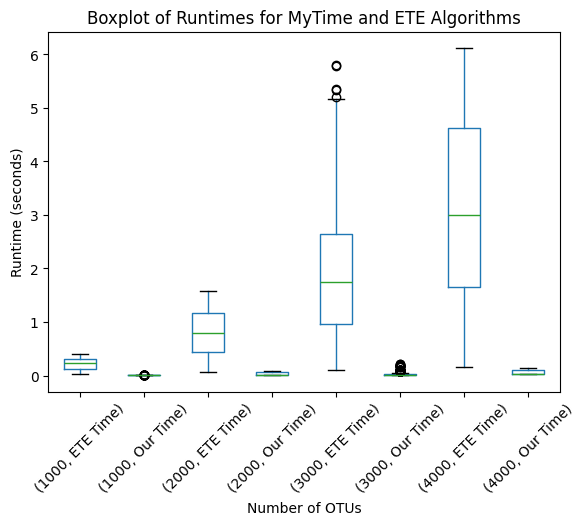

In [11]:
df_melted = pd.melt(df, id_vars=['OTUs'], value_vars=['Our Time', 'ETE Time'], var_name='Algorithm', value_name='Runtime')

# Plot the boxplot
plt.figure(figsize=(20, 6))
colors = {'Our Time': 'blue', 'ETE Time': 'orange'}  # Define colors for each algorithm
boxplot = df_melted.boxplot(column='Runtime', by=['OTUs', 'Algorithm'], grid=False)
plt.xlabel('Number of OTUs')
plt.ylabel('Runtime (seconds)')
plt.title('Boxplot of Runtimes for MyTime and ETE Algorithms')
plt.suptitle('')  # Remove default title

plt.xticks(rotation=45)
# plt.xticks(range(1,20,2),range(df['OTUs'].min(), df['OTUs'].max() + 1,100))

plt.show()

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (31).

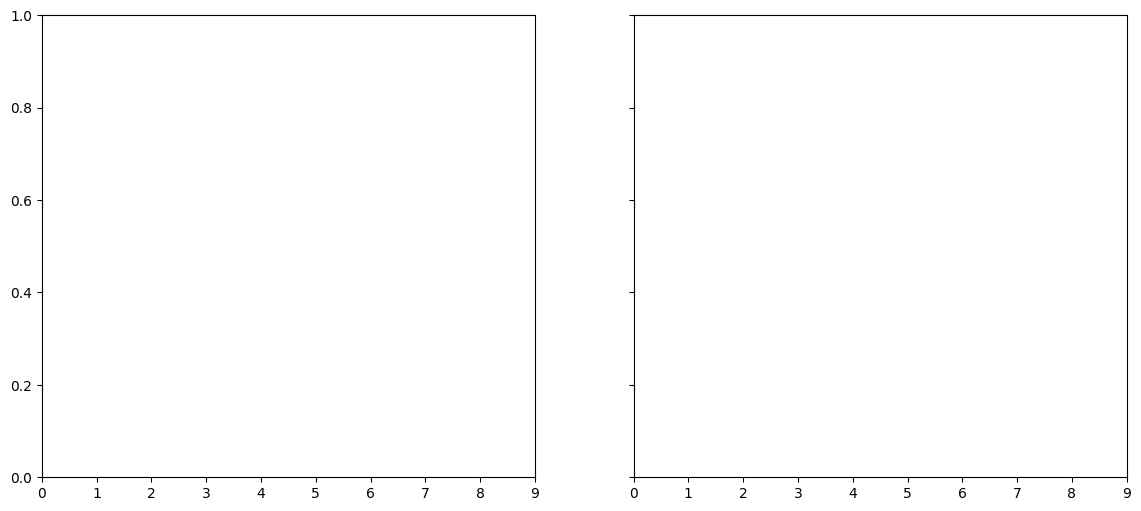

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Customize x-axis ticks for each subplot
for ax in axes:
    plt.xticks(range(0,10,1),range(df['OTUs'].min(), df['OTUs'].max() + 1,100))

# Plot boxplots for each algorithm
for i, algorithm in enumerate(['Our Time', 'ETE Time']):
    ax = axes[i]
    df_algorithm = df[['OTUs', algorithm]].copy()
    df_algorithm['OTUs'] += i * 0.1  # Shift for side-by-side appearance
    df_algorithm.boxplot(column=algorithm, by='OTUs', ax=ax, grid=False)
    ax.set_xlabel('Number of OTUs')
    ax.set_ylabel('Runtime')
    ax.set_title(f'Boxplot of Runtimes for {algorithm} Algorithm')

# Set different y-axis limits for each subplot
axes[0].set_ylim(0, df[['Our Time', 'ETE Time']].values.max() * 1.1)
axes[1].set_ylim(0, df[['Our Time', 'ETE Time']].values.max() * 1.1)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, '')

<Figure size 800x600 with 0 Axes>

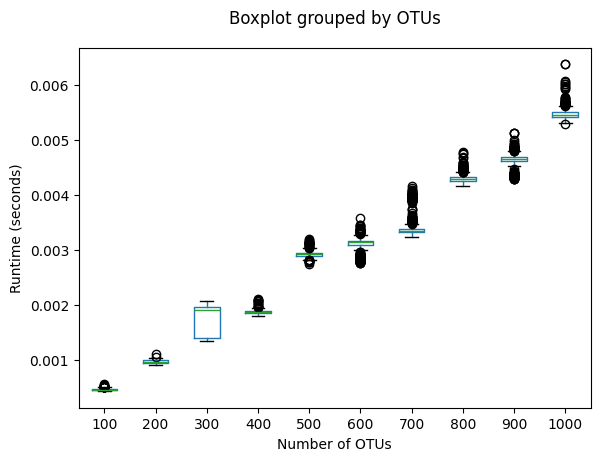

In [ ]:
df_mytime = df[['OTUs', 'Our Time']].copy()

# Plot the boxplot for MyTime
plt.figure(figsize=(8, 6))
df_mytime.boxplot(column='Our Time', by='OTUs', grid=False)
plt.xlabel('Number of OTUs')
plt.ylabel('Runtime (seconds)')
plt.title('')

Text(0.5, 1.0, '')

<Figure size 800x600 with 0 Axes>

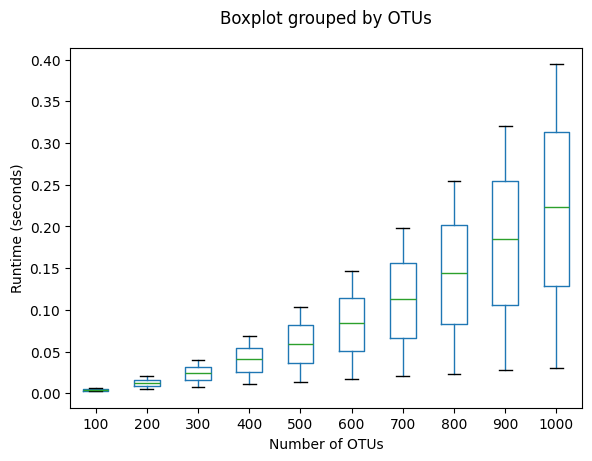

In [ ]:
df_mytime = df[['OTUs', 'ETE Time']].copy()

# Plot the boxplot for MyTime
plt.figure(figsize=(8, 6))
df_mytime.boxplot(column='ETE Time', by='OTUs', grid=False)
plt.xlabel('Number of OTUs')
plt.ylabel('Runtime (seconds)')
plt.title('')

In [ ]:
df2 = pd.read_pickle("./results_2024/runtimes1000-4000_1.pkl")

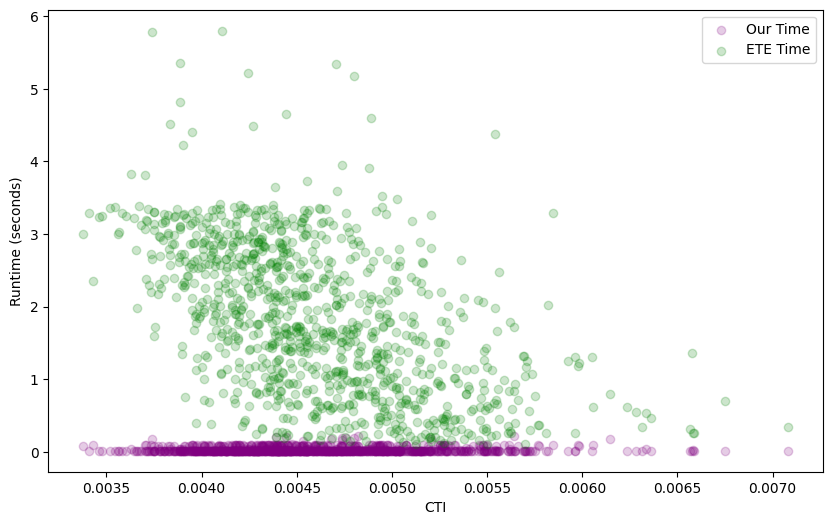

In [ ]:
df_filtered = df2[df2['OTUs'] == 3000]

# Plot scatterplots for both algorithms
plt.figure(figsize=(10, 6))

# Scatterplot for Our Time
plt.scatter(df_filtered['CTI'], df_filtered['Our Time'], color='purple', label='Our Time', marker='o',alpha=0.2)

# Scatterplot for ETE Time
plt.scatter(df_filtered['CTI'], df_filtered['ETE Time'], color='green', label='ETE Time', marker='o',alpha=0.2)

plt.xlabel('CTI')
plt.ylabel('Runtime (seconds)')
plt.title('')
plt.legend()

plt.show()

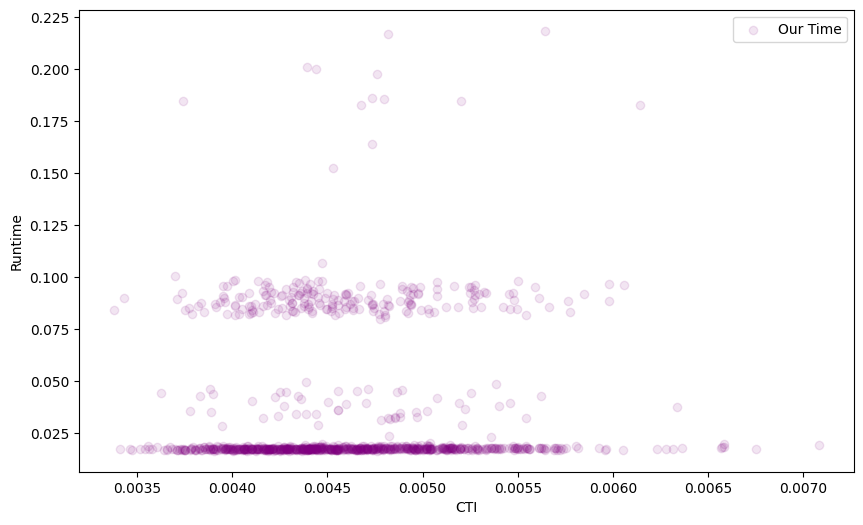

In [ ]:
plt.figure(figsize=(10, 6))

# Scatterplot for Our Time
plt.scatter(df_filtered['CTI'], df_filtered['Our Time'], color='purple', label='Our Time', marker='o',alpha=0.1)

plt.xlabel('CTI')
plt.ylabel('Runtime')
plt.title('')
plt.legend()

plt.show()

In [ ]:
balanced_df = pd.read_csv("./results_2024/balanced_tests_4096_1.csv")
balanced_df.columns = balanced_df.columns.str.strip()

/tmp/ipykernel_1963212/3518401771.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  boxplot_axes[0].set_ylabel('Runtime (s)')


<Figure size 1500x500 with 0 Axes>

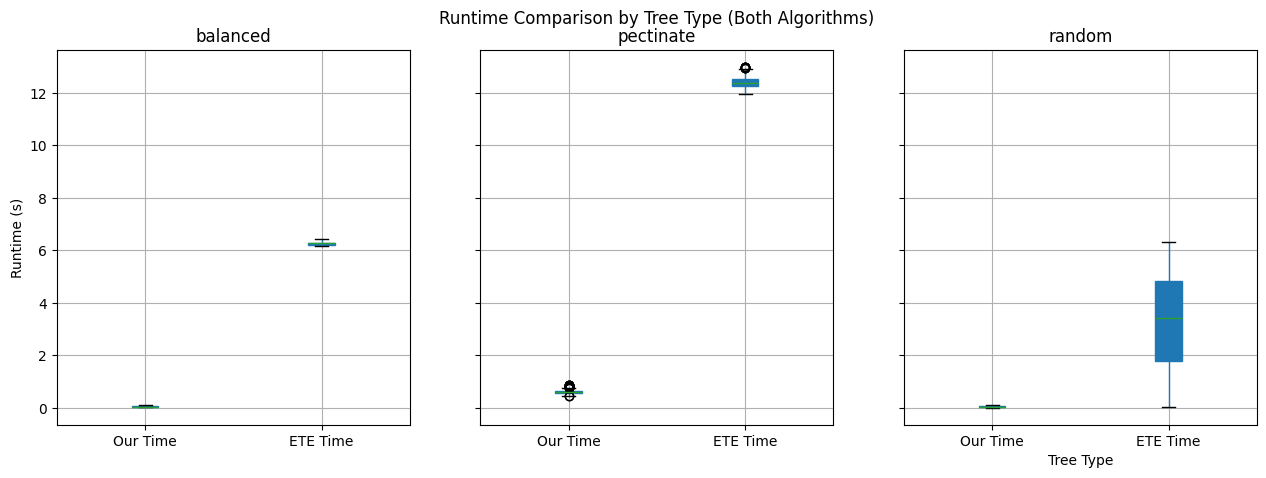

In [ ]:
grouped_df = balanced_df.groupby('type')[['Our Time', 'ETE Time']]

# Create boxplot
plt.figure(figsize=(15, 5))  # Adjust size if necessary
boxplot_axes = grouped_df.boxplot(layout=(1, 3), figsize=(15, 5), patch_artist=True)
plt.suptitle('Runtime Comparison by Tree Type (Both Algorithms)')
plt.xlabel('Tree Type')
boxplot_axes[0].set_ylabel('Runtime (s)')
plt.show()

/tmp/ipykernel_1963212/2178479341.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  boxplot_axes[0].set_ylabel('Runtime (s)')


<Figure size 1500x500 with 0 Axes>

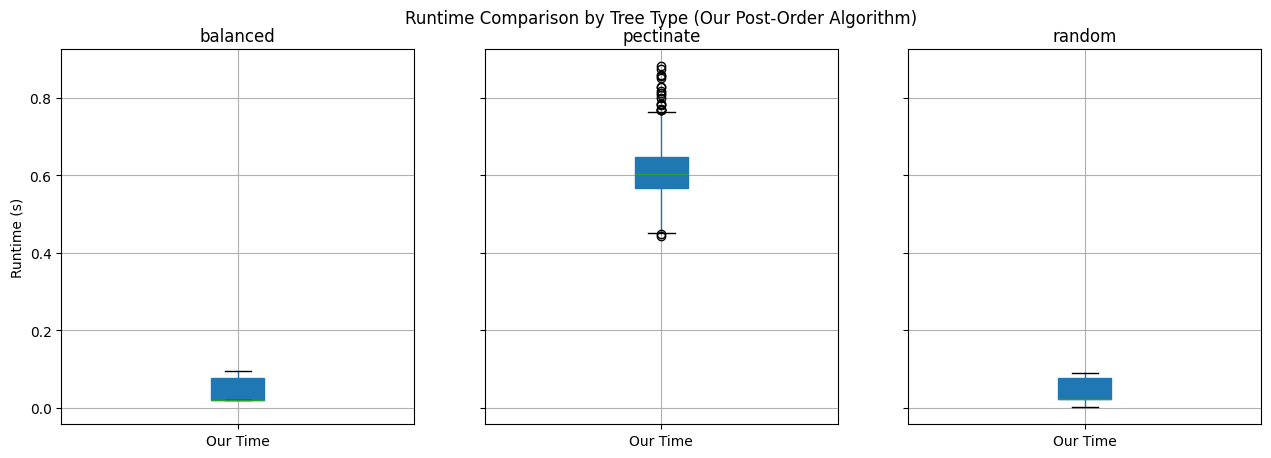

In [ ]:
grouped_df = balanced_df.groupby('type')[['Our Time']]

# Create boxplot
plt.figure(figsize=(15, 5))  # Adjust size if necessary
boxplot_axes = grouped_df.boxplot(layout=(1, 3), figsize=(15, 5), patch_artist=True)
plt.suptitle('Runtime Comparison by Tree Type (Our Post-Order Algorithm)')
# plt.suptitle('')  # Remove default title
plt.ylabel('Runtime(s)')
boxplot_axes[0].set_ylabel('Runtime (s)')
plt.show()

In [16]:
bal_df = pd.read_csv("./results_2024/balanced_tests_2-2048.csv")
bal_df

,type,size,id,cti,Our Time,ETE Time
0,balanced,4,0,0.000000,0.000016,0.000059
1,pectinate,4,0,1.000000,0.000017,0.000058
2,balanced,4,1,0.000000,0.000016,0.000059
3,pectinate,4,1,1.000000,0.000016,0.000057
4,balanced,4,2,0.000000,0.000016,0.000059
...,...,...,...,...,...,...
29259,random,2048,995,0.006570,0.059668,0.546610
29260,random,2048,996,0.005353,0.059277,1.430273
29261,random,2048,997,0.007187,0.058975,0.639290
29262,random,2048,998,0.007663,0.059638,0.104427


In [17]:
df_random = bal_df[bal_df["type"]=="random"]
df_pectinate = bal_df[bal_df["type"]=="pectinate"]
df_balanced = bal_df[bal_df["type"]=="balanced"]

df_random.drop(columns=['type'], inplace=True)
df_pectinate.drop(columns=['type'], inplace=True)
df_balanced.drop(columns=['type'], inplace=True)

/tmp/ipykernel_2518796/3005909526.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_random.drop(columns=['type'], inplace=True)
/tmp/ipykernel_2518796/3005909526.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pectinate.drop(columns=['type'], inplace=True)
/tmp/ipykernel_2518796/3005909526.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_balanced.drop(columns=['type'], inplace=True)


In [20]:
df_random

,size,id,cti,Our Time,ETE Time
19264,4,0,1.000000,0.000056,0.000125
19265,4,1,0.000000,0.000030,0.000119
19266,4,2,1.000000,0.000025,0.000103
19267,4,3,1.000000,0.000024,0.000102
19268,4,4,0.000000,0.000024,0.000117
...,...,...,...,...,...
29259,2048,995,0.006570,0.059668,0.546610
29260,2048,996,0.005353,0.059277,1.430273
29261,2048,997,0.007187,0.058975,0.639290
29262,2048,998,0.007663,0.059638,0.104427


In [55]:
sizes_order = sorted(df_random['size'].unique())
sizes_order.append(2500)
sizes_order

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 2500]

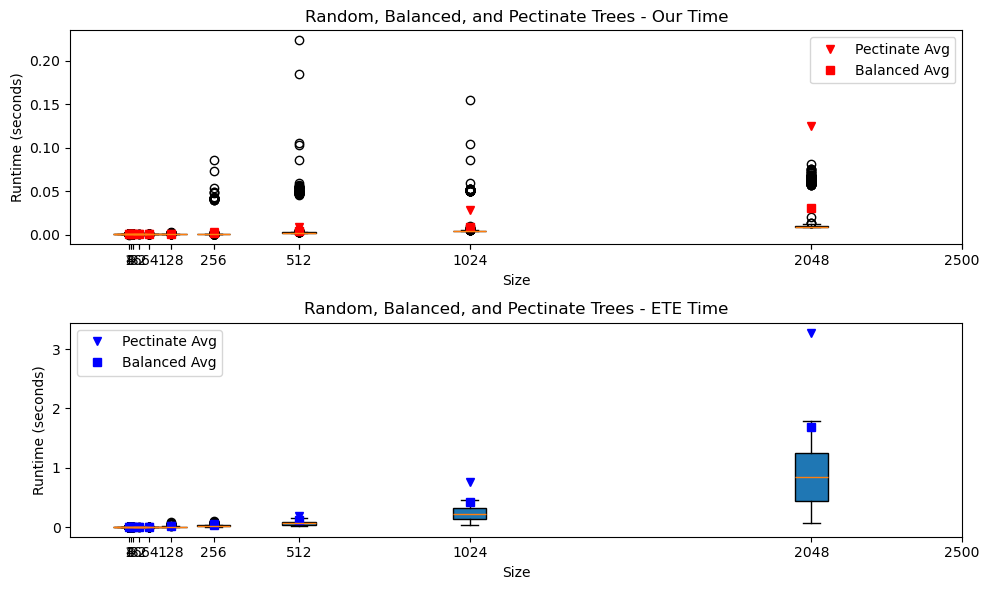

In [60]:
# Assuming df_random, df_pectinate, and df_balanced are your dataframes

# Create a combined dataframe for random data
df_random_combined = pd.concat([df_random['size'], df_random['Our Time'], df_random['ETE Time']], axis=1)

# Calculate the average runtimes for pectinate and balanced data
pectinate_avg = df_pectinate.groupby('size').mean().reset_index()
balanced_avg = df_balanced.groupby('size').mean().reset_index()

# Plot boxplots for random data
plt.figure(figsize=(10, 6))

# Overlay average runtimes for pectinate and balanced data
plt.subplot(2, 1, 1)
plt.xticks(sizes_order, sizes_order)

for size in sizes_order:
    plt.boxplot(df_random[df_random['size'] == size]['Our Time'], positions=[size], patch_artist=True,widths=100)
plt.title('Random, Balanced, and Pectinate Trees - Our Time')
plt.xlabel('Size')
plt.ylabel('Runtime (seconds)')
# plt.xticks(sizes_order, sizes_order)

plt.plot(pectinate_avg['size'], pectinate_avg['Our Time'], 'rv', label='Pectinate Avg')
plt.plot(balanced_avg['size'], balanced_avg['Our Time'], 'rs', label='Balanced Avg')
plt.boxplot
plt.legend()

plt.subplot(2, 1, 2)

for size in sizes_order:
    plt.boxplot(df_random[df_random['size'] == size]['ETE Time'], positions=[size], patch_artist=True,widths=100)
plt.title('Random, Balanced, and Pectinate Trees - ETE Time')
plt.xlabel('Size')
plt.ylabel('Runtime (seconds)')
# plt.xticks(sizes_order, sizes_order)
plt.plot(pectinate_avg['size'], pectinate_avg['ETE Time'], 'bv', label='Pectinate Avg')
plt.plot(balanced_avg['size'], balanced_avg['ETE Time'], 'bs', label='Balanced Avg')
plt.legend()

plt.tight_layout()
plt.show()

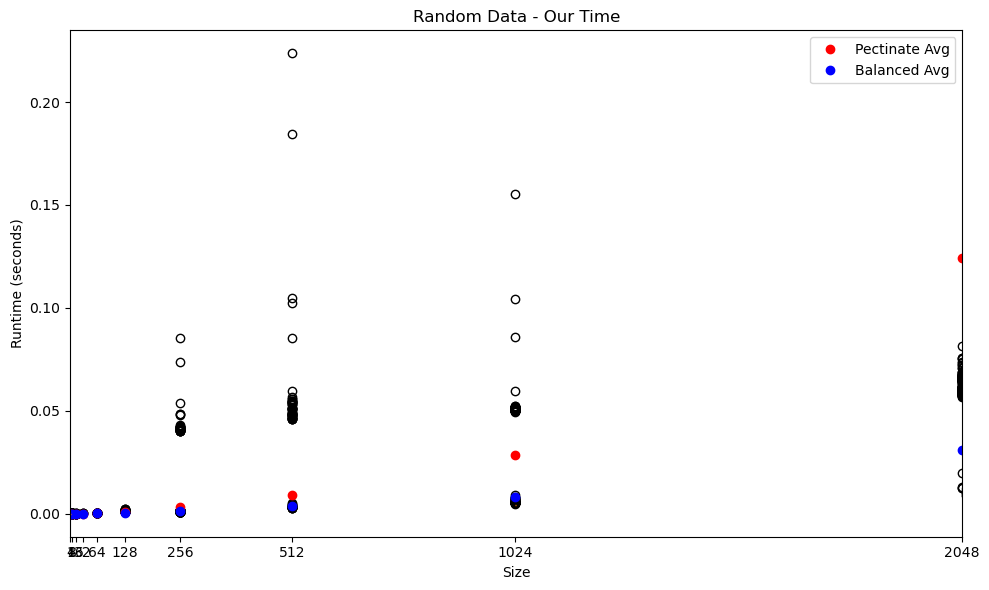

In [41]:
# Create a single plot
plt.figure(figsize=(10, 6))

# Plot boxplots for random data
for size in sizes_order:
    plt.boxplot(df_random[df_random['size'] == size]['Our Time'], positions=[size])
plt.title('Random Data - Our Time')
plt.xlabel('Size')
plt.ylabel('Runtime (seconds)')
plt.xticks(sizes_order, sizes_order)

# Overlay average runtimes for pectinate and balanced data
plt.plot(pectinate_avg['size'], pectinate_avg['Our Time'], 'ro', label='Pectinate Avg')
plt.plot(balanced_avg['size'], balanced_avg['Our Time'], 'bo', label='Balanced Avg')
plt.legend()

plt.tight_layout()
plt.show()